In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
data =pd.read_csv("Advertising Budget and Sales.csv")

In [6]:
data.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
data.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [10]:
data = data.drop(columns=['Unnamed: 0'])

In [17]:
data.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


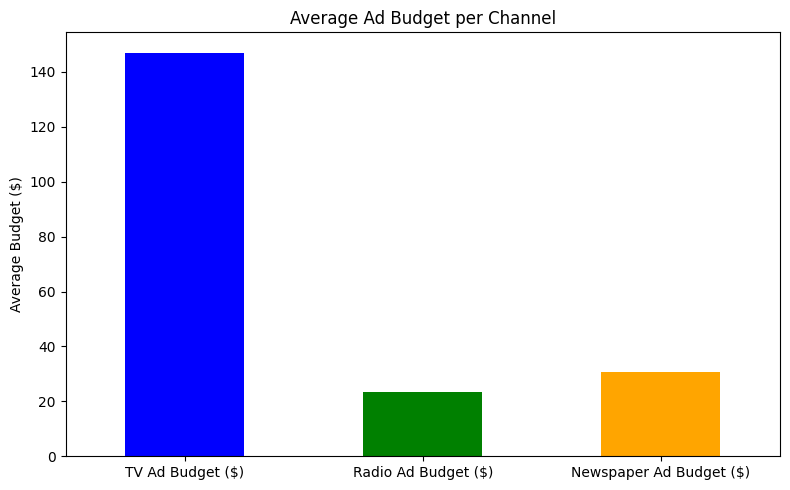

In [12]:
import matplotlib.pyplot as plt

avg_budget = data[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']].mean()

plt.figure(figsize=(8, 5))
avg_budget.plot(kind='bar', color=['blue', 'green', 'orange'])
plt.title('Average Ad Budget per Channel')
plt.ylabel('Average Budget ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



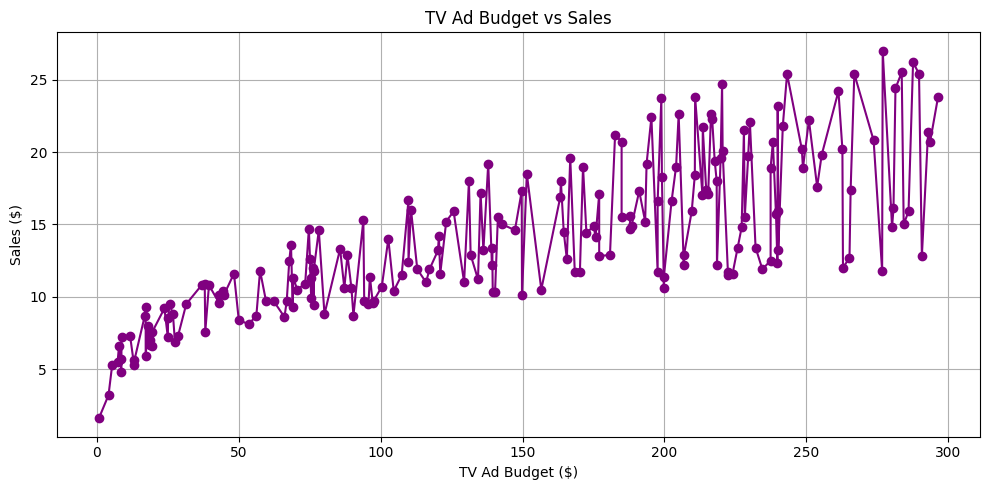

In [13]:
sorted_data = data.sort_values(by='TV Ad Budget ($)')

plt.figure(figsize=(10, 5))
plt.plot(sorted_data['TV Ad Budget ($)'], sorted_data['Sales ($)'], marker='o', linestyle='-', color='purple')
plt.title('TV Ad Budget vs Sales')
plt.xlabel('TV Ad Budget ($)')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


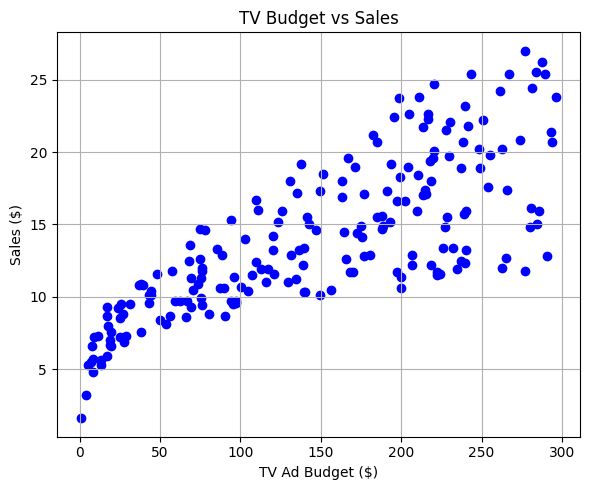

In [14]:
plt.figure(figsize=(6, 5))
plt.scatter(data['TV Ad Budget ($)'], data['Sales ($)'], color='blue')
plt.title('TV Budget vs Sales')
plt.xlabel('TV Ad Budget ($)')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.tight_layout()
plt.show()



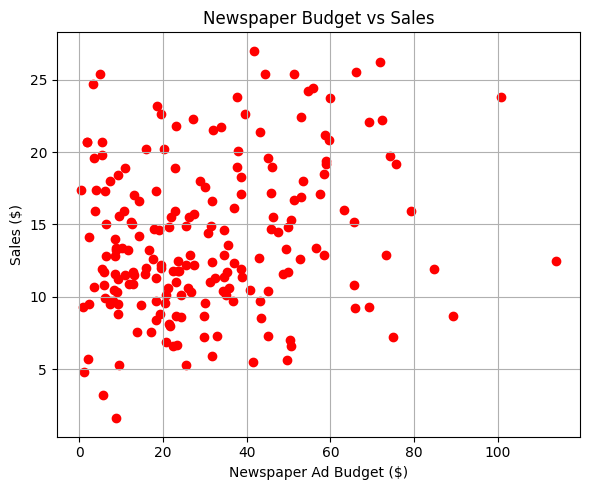

In [15]:
plt.figure(figsize=(6, 5))
plt.scatter(data['Newspaper Ad Budget ($)'], data['Sales ($)'], color='red')
plt.title('Newspaper Budget vs Sales')
plt.xlabel('Newspaper Ad Budget ($)')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


**Histogram-Distribution of Sales**

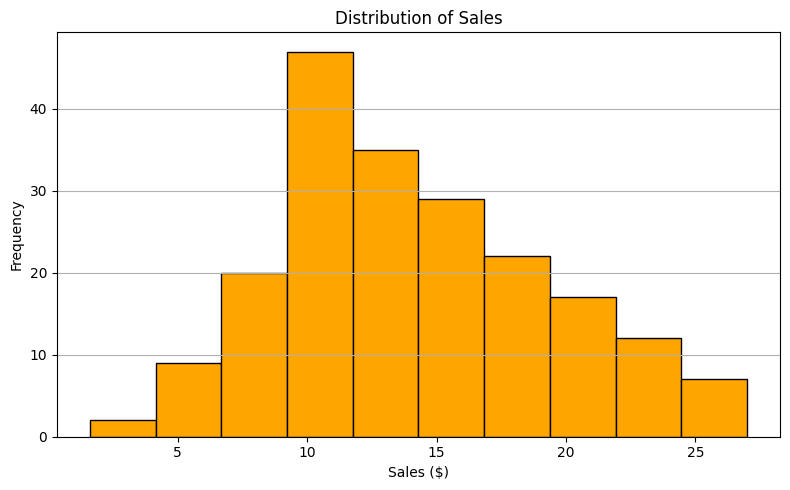

In [16]:
plt.figure(figsize=(8, 5))
plt.hist(data['Sales ($)'], bins=10, color='orange', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales ($)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



**Pie Chart total ad budget**

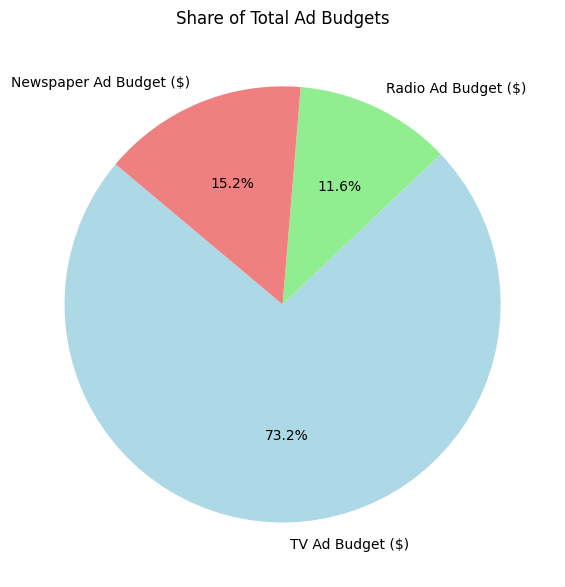

In [18]:
total_budgets = data[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']].sum()

plt.figure(figsize=(6, 6))
plt.pie(total_budgets, labels=total_budgets.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Share of Total Ad Budgets')
plt.tight_layout()
plt.show()


**Stacked Bar Chart – Ad Budgets per Observation (First 10 Rows)**

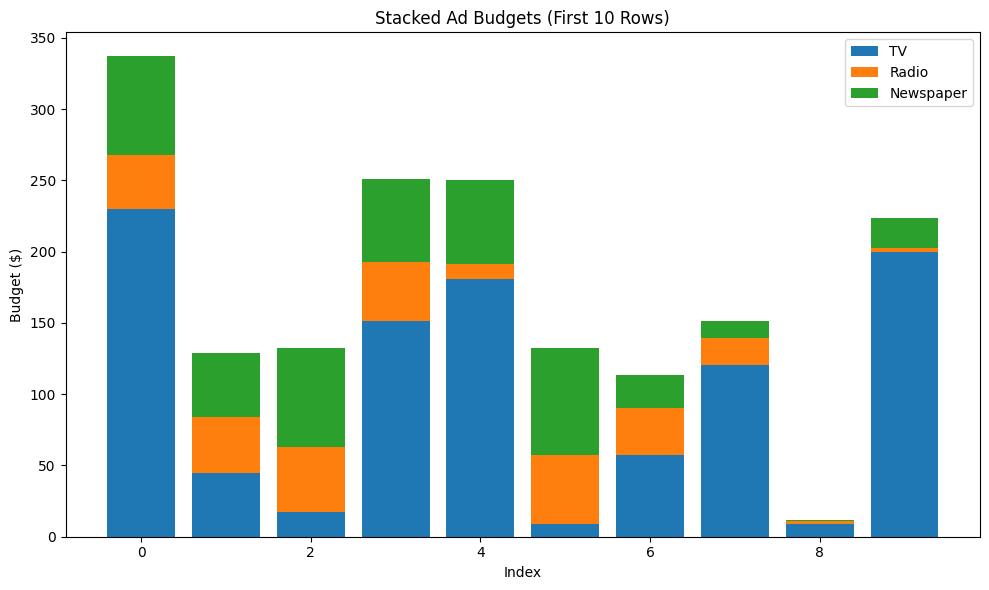

In [19]:
subset = data[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']].head(10)

plt.figure(figsize=(10, 6))
bottom_bar = plt.bar(subset.index, subset['TV Ad Budget ($)'], label='TV')
middle_bar = plt.bar(subset.index, subset['Radio Ad Budget ($)'], bottom=subset['TV Ad Budget ($)'], label='Radio')
top_bar = plt.bar(subset.index, subset['Newspaper Ad Budget ($)'],
                  bottom=subset['TV Ad Budget ($)'] + subset['Radio Ad Budget ($)'], label='Newspaper')
plt.title('Stacked Ad Budgets (First 10 Rows)')
plt.xlabel('Index')
plt.ylabel('Budget ($)')
plt.legend()
plt.tight_layout()
plt.show()



**Box Plot – Distribution of Budgets per Channel**

/tmp/ipython-input-951567770.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data['TV Ad Budget ($)'], data['Radio Ad Budget ($)'], data['Newspaper Ad Budget ($)']],


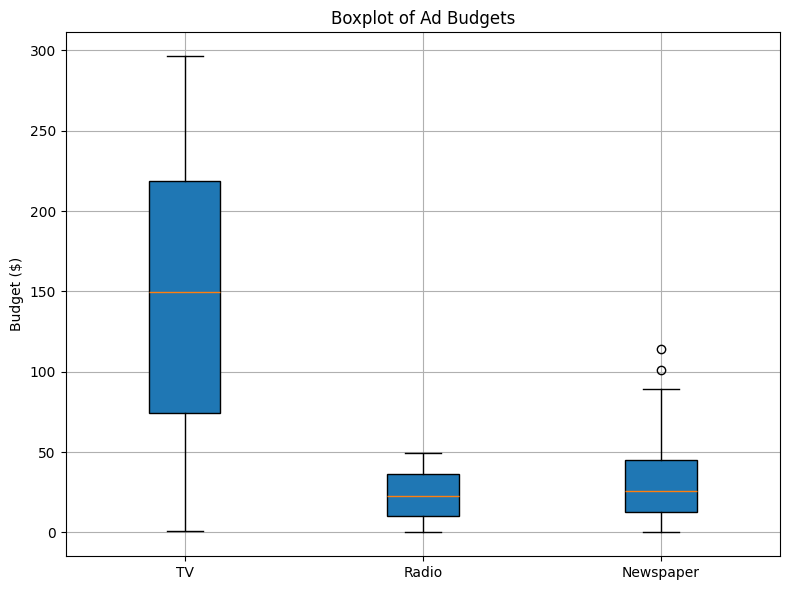

In [20]:
plt.figure(figsize=(8, 6))
plt.boxplot([data['TV Ad Budget ($)'], data['Radio Ad Budget ($)'], data['Newspaper Ad Budget ($)']],
            labels=['TV', 'Radio', 'Newspaper'], patch_artist=True)
plt.title('Boxplot of Ad Budgets')
plt.ylabel('Budget ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


**Subplots – All Ad Budgets vs Sales**

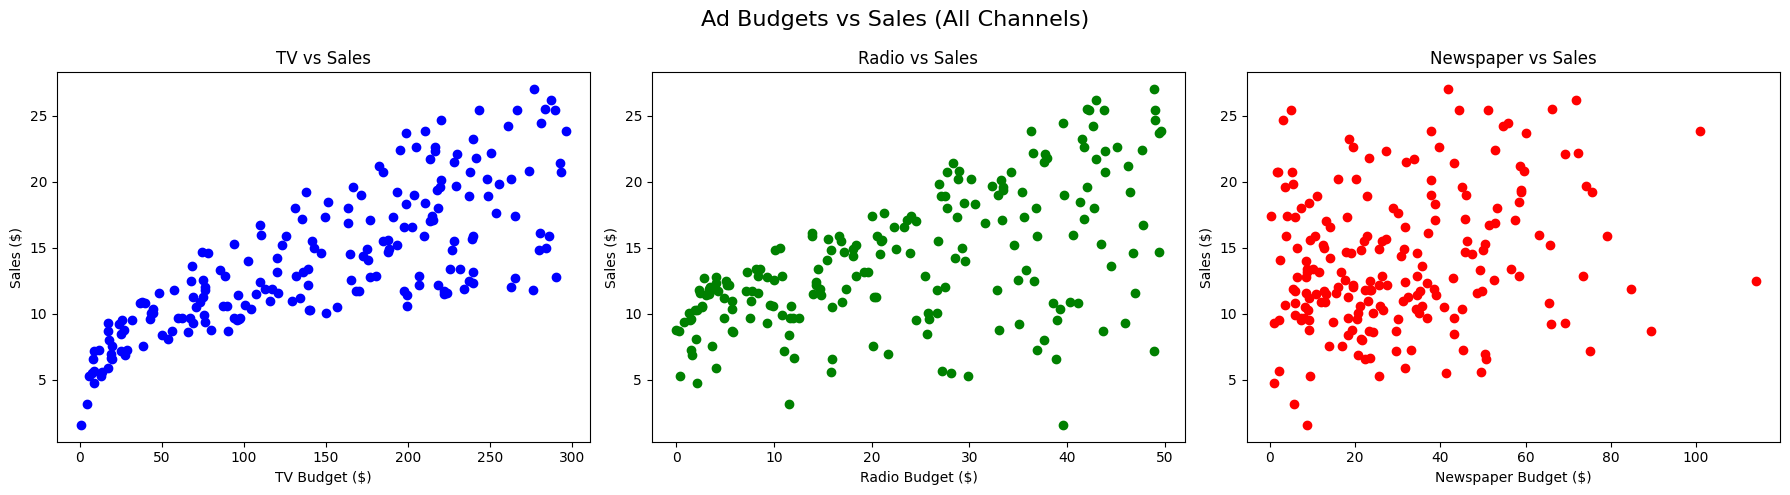

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# TV
axs[0].scatter(data['TV Ad Budget ($)'], data['Sales ($)'], color='blue')
axs[0].set_title('TV vs Sales')
axs[0].set_xlabel('TV Budget ($)')
axs[0].set_ylabel('Sales ($)')

# Radio
axs[1].scatter(data['Radio Ad Budget ($)'], data['Sales ($)'], color='green')
axs[1].set_title('Radio vs Sales')
axs[1].set_xlabel('Radio Budget ($)')
axs[1].set_ylabel('Sales ($)')

# Newspaper
axs[2].scatter(data['Newspaper Ad Budget ($)'], data['Sales ($)'], color='red')
axs[2].set_title('Newspaper vs Sales')
axs[2].set_xlabel('Newspaper Budget ($)')
axs[2].set_ylabel('Sales ($)')

plt.suptitle('Ad Budgets vs Sales (All Channels)', fontsize=16)
plt.tight_layout()
plt.show()
